# Machine Learning
### Sample variance versus population variance

**Sample variance** measures the **spread** of a **sample** (subset) of data points, while **population variance** measures the **spread** of an **entire** dataset. 
- The key difference is that sample variance uses $n−1$ in its calculation to correct for **bias**, whereas population variance uses **N**, the total number of observations.

**Reminder:**
- **Population:** The *entire* group (set) of data points or items you want to study or draw conclusions about.  
- **Sample:** A *subset* of the *population* that is actually observed or measured, used to make inferences about the population.
<hr>

**Population mean:** It is the true average of the entire population, and is denoted by $\mu$:
<br>$\large \mu=\frac{1}{N}\sum_{i=1}^N x_i$
<br> Where $N$ is the population size (the number of its data points).
<hr>

**Sample mean:** It is the average of observed data points in the sample. Assume we have $n$ data points in the sample. Then:
<br>$\large \bar{x}=\frac{1}{n} \sum_{i=1}^n x_i$
- Sample mean is a random variable (changes with different samples) used to estimate $\mu$.
- It is an **unbiased estimator** of $\mu$. So, $E[\bar{x}]=\mu$
<hr>

**Population variance:** It it the true average squared deviation from the population mean $\mu$.
<br>$\large \sigma^2=\frac{1}{N}\sum_{i=1}^N (x_i-\mu)^2$
<hr>

**Sample variance:** It is an estimate of $\sigma^2$ based on the data points in the sample.
<br>$\large s^2=\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})^2$
- Here, we use $n-1$ instead of $n$ in the denominator due to **Bessel's correction**.
- This way $s^2$ becomes an *unbiased estimator* of $\sigma^2$. So, $E[s^2]=\sigma^2$ 
<hr>

**Attention:** In **machine learning**, we often care more about prediction than unbiased estimation. So, $\frac{1}{n}$ is sometimes acceptable. But in **statistics** and **feature selection**, $\frac{1}{n-1}$ is standard.
<hr>

In the following, we run a simulation to show the bias in variance estimation, and to see Bessel’s correction in action. Therefore, we will:
- Draw many random samples from a known population (with its true variance).
- Compute sample variance using both $\frac{1}{n}$ and $\frac{1}{n-1}$.
- Compare their average (expected value) to the true variance.

<hr>

https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/machine-learning/background-knowledge/

In [1]:
# Import required modules
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# True population parameters
true_variance = 4.0
n = 5 # sample size
num_trials = 30_000

# Storage for variance estimates
biased_vars = []
unbiased_vars = []

# Generate many samples and compute variances
for _ in range(num_trials):
    # σ = 2 → σ² = 4
    sample = np.random.normal(loc=0, scale=np.sqrt(true_variance), size=n)  
    
    # Biased variance (divide by n)
    biased_var = np.var(sample, ddof=0)  # ddof=0 → 1/n
    
    # Unbiased variance (divide by n-1)
    unbiased_var = np.var(sample, ddof=1)  # ddof=1 → 1/(n-1)
    
    biased_vars.append(biased_var)
    unbiased_vars.append(unbiased_var)

# Compute averages
avg_biased = np.mean(biased_vars)
avg_unbiased = np.mean(unbiased_vars)

# Theoretical expected value of biased estimator: (n-1)/n * σ²
theoretical_biased = (n - 1) / n * true_variance

print(f"True population variance: {true_variance}")
print(f"Average biased variance (1/n):       {avg_biased:.4f} (theory: {theoretical_biased:.4f})")
print(f"Average unbiased variance (1/(n-1)): {avg_unbiased:.4f}")

True population variance: 4.0
Average biased variance (1/n):       3.1843 (theory: 3.2000)
Average unbiased variance (1/(n-1)): 3.9803


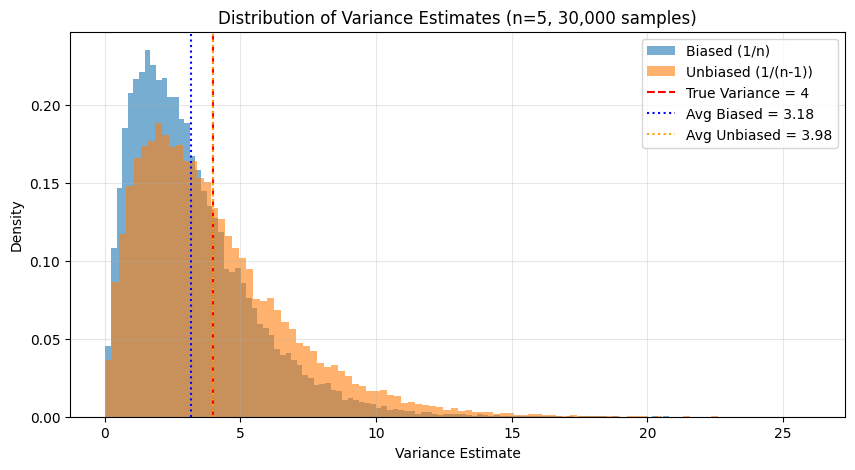

In [4]:
# Plot the distributions

plt.figure(figsize=(10, 5))

plt.hist(biased_vars, bins=100, alpha=0.6, label='Biased (1/n)', density=True)
plt.hist(unbiased_vars, bins=100, alpha=0.6, label='Unbiased (1/(n-1))', density=True)

plt.axvline(true_variance, color='red', linestyle='--', label='True Variance = 4')
plt.axvline(avg_biased, color='blue', linestyle=':', label=f'Avg Biased = {avg_biased:.2f}')
plt.axvline(avg_unbiased, color='orange', linestyle=':', label=f'Avg Unbiased = {avg_unbiased:.2f}')

plt.xlabel('Variance Estimate')
plt.ylabel('Density')
plt.title(f'Distribution of Variance Estimates (n={n}, {num_trials:,} samples)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()